In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hotel_bookings_RAW.csv')

# Initial Screening

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.width', None)
print("DataFrame completo:")
print(df)

DataFrame completo:
               hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2         

### Representación Gráfica de las Variables Categóricas

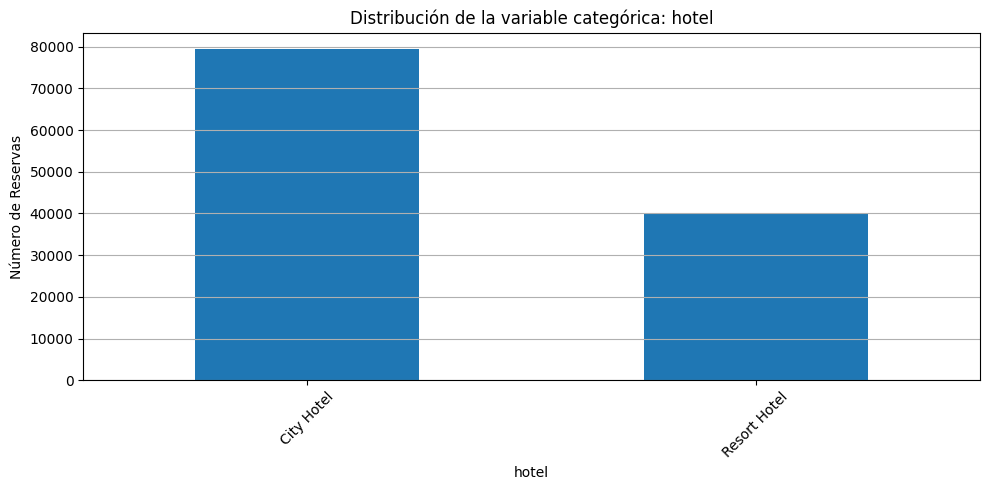

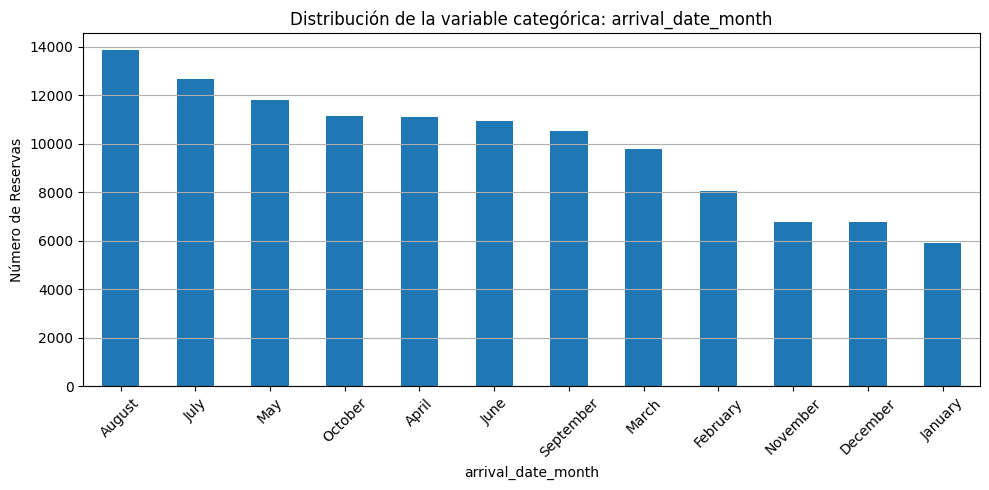

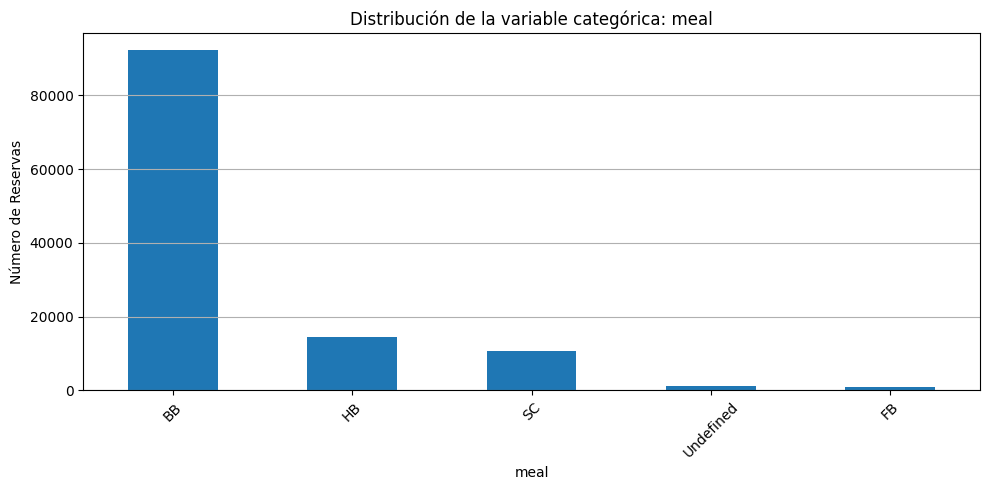

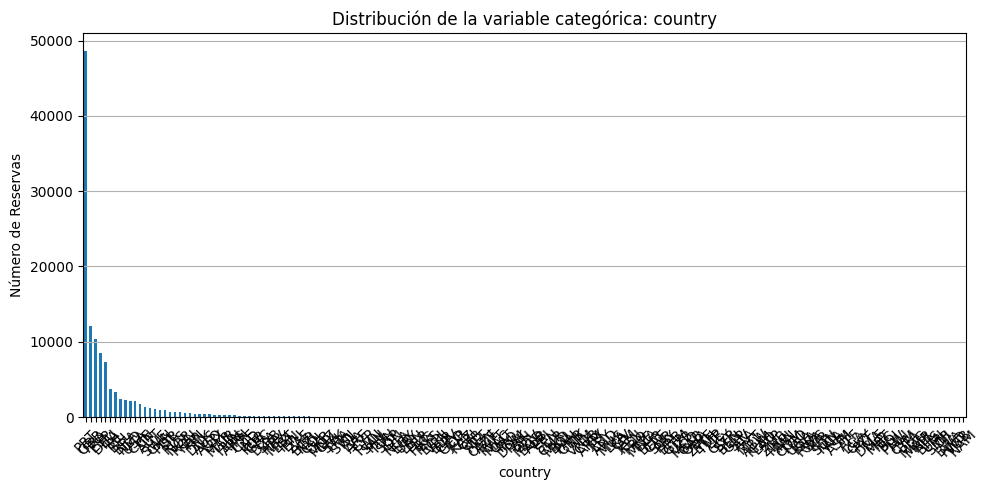

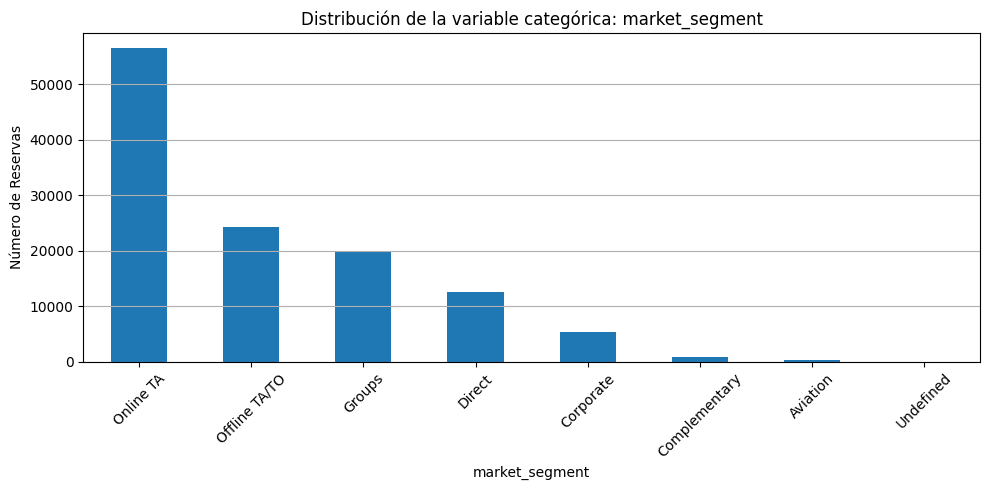

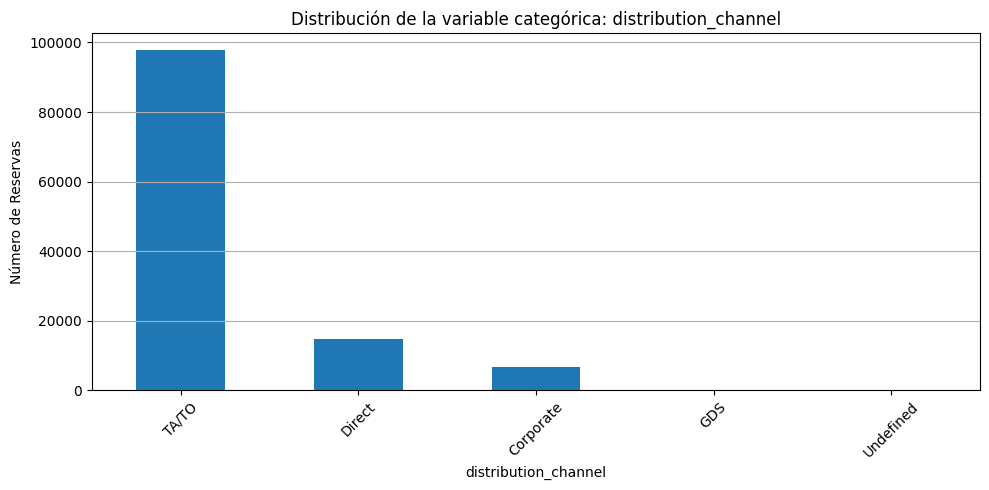

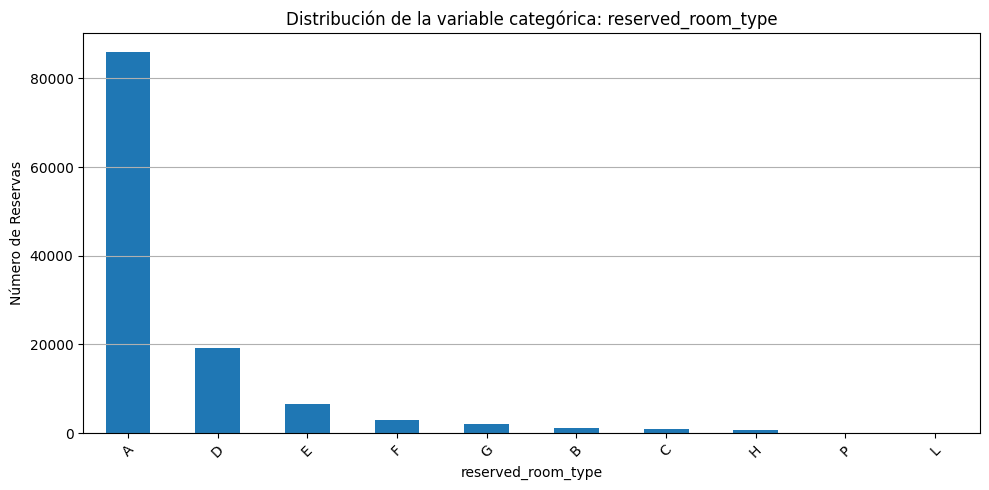

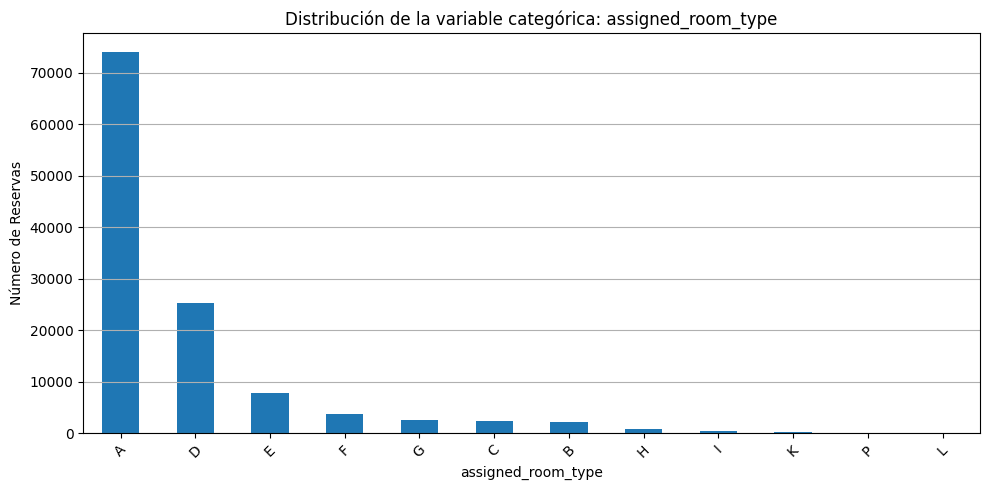

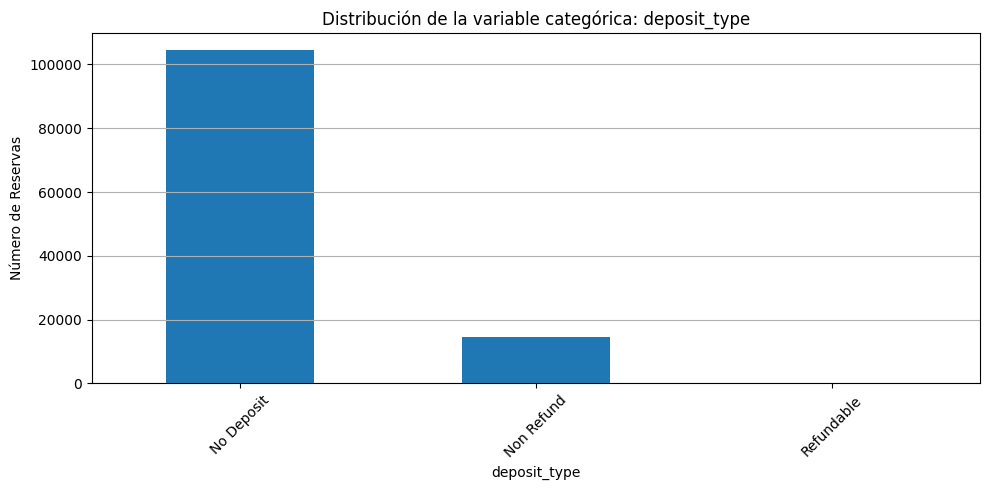

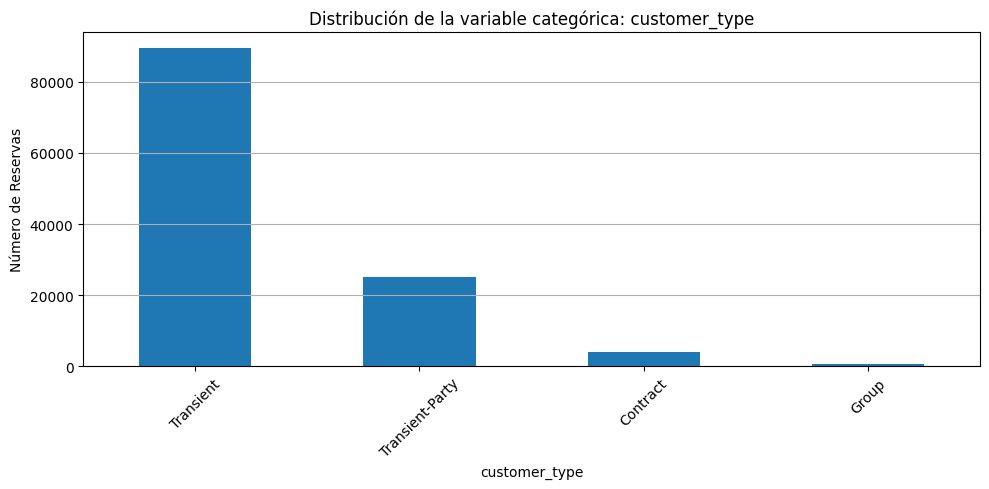

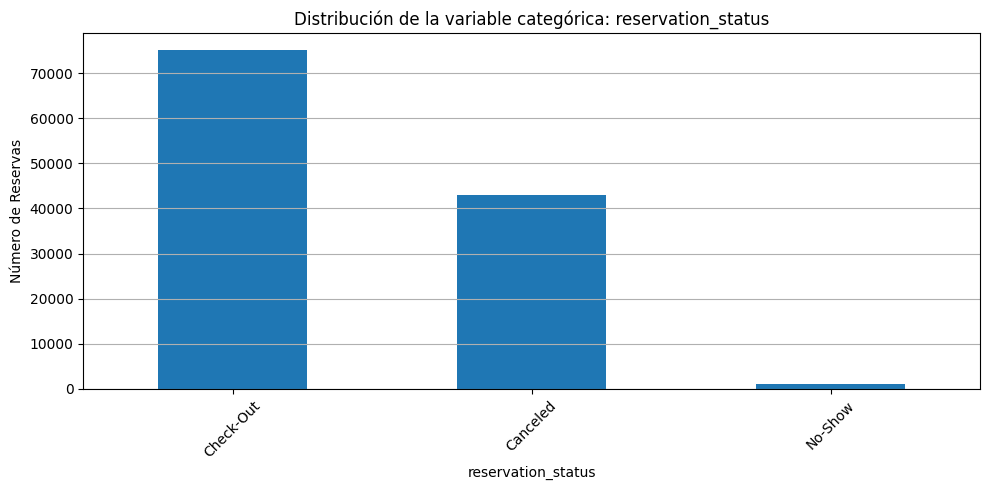

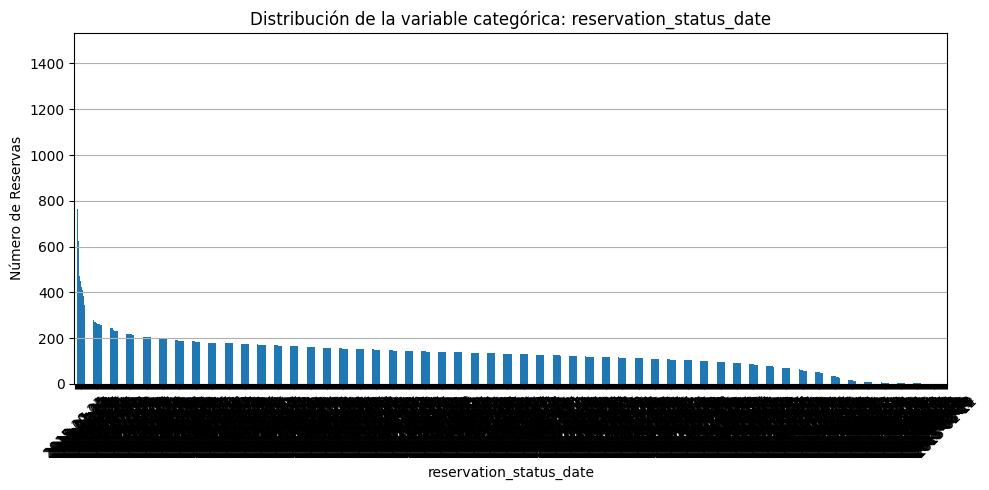

In [10]:
# Identificar automáticamente columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Crear gráficos de barras para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Reservas')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout() 

## Handle Missing Data

### Dropping Columns with Null- Values

Hay dos columnas, Agente y Compañía que tienen muchos valores nulos, por tanto vamos a analizar si éstas las conservamos o las mantenemos en función de la información que contienen:


In [14]:
print(df['agent'].head(10))
print("\nValores únicos en la columna 'agent':")
print(df['agent'].value_counts())

0      NaN
1      NaN
2      NaN
3    304.0
4    240.0
5    240.0
6      NaN
7    303.0
8    240.0
9     15.0
Name: agent, dtype: float64

Valores únicos en la columna 'agent':
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


In [15]:
nulos_en_agentes = df['agent'].isnull().sum()
print(f"Número de valores nulos en la columna 'agent': {nulos_en_agentes}")

Número de valores nulos en la columna 'agent': 16340


In [16]:
conteo = (df['distribution_channel'] == 'Direct').sum()
print(f"Número de valores Direct en la columna 'Distribution Channel': {conteo}")

Número de valores Direct en la columna 'Distribution Channel': 14645


In [17]:
print(df['company'].head(10))
print("\nValores únicos en la columna 'company':")
print(df['agent'].value_counts())

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: company, dtype: float64

Valores únicos en la columna 'company':
agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64


In [18]:
nulos_en_agentes = df['agent'].isnull().sum()
print(f"Número de valores nulos en la columna 'agent': {nulos_en_agentes}")

Número de valores nulos en la columna 'agent': 16340


La Columna Agent tiene muchos valores nulos, pero en principio no eliminamos ya que nos puede dar los agentes con maypr porcentaje de cancelación

#### Eliminamos Columna 'Company'

In [21]:
df = df.drop('company', axis=1)

#### Eliminamos filas con valores nulos en la Columna 'Children'

In [23]:
print("Conteo de valores únicos en la columna 'children':")
conteo_valores = df['children'].value_counts(dropna=False)
print(conteo_valores)

Conteo de valores únicos en la columna 'children':
children
0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: count, dtype: int64


In [24]:
# Eliminar filas donde 'children' sea nulo
df = df.dropna(subset=['children'])

#### Eliminamos filas con valores nulos en la Columna 'Country'

In [26]:
df = df.dropna(subset=['country'])

In [27]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

### Eliminamos registros donde 'adults' = 0 && 'children' = 0

In [29]:
df = df[~((df['adults'] == 0) & (df['children'] == 0))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118728 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118728 non-null  object 
 1   is_canceled                     118728 non-null  int64  
 2   lead_time                       118728 non-null  int64  
 3   arrival_date_year               118728 non-null  int64  
 4   arrival_date_month              118728 non-null  object 
 5   arrival_date_week_number        118728 non-null  int64  
 6   arrival_date_day_of_month       118728 non-null  int64  
 7   stays_in_weekend_nights         118728 non-null  int64  
 8   stays_in_week_nights            118728 non-null  int64  
 9   adults                          118728 non-null  int64  
 10  children                        118728 non-null  float64
 11  babies                          118728 non-null  int64  
 12  meal                 

### Eliminación registros donde 'stays_in_weekend_nights' = 0 && 'stays_in_week_nights' = 0

In [31]:
df = df[~((df['stays_in_weekend_nights'] == 0) & (df['stays_in_week_nights'] == 0))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118088 non-null  object 
 1   is_canceled                     118088 non-null  int64  
 2   lead_time                       118088 non-null  int64  
 3   arrival_date_year               118088 non-null  int64  
 4   arrival_date_month              118088 non-null  object 
 5   arrival_date_week_number        118088 non-null  int64  
 6   arrival_date_day_of_month       118088 non-null  int64  
 7   stays_in_weekend_nights         118088 non-null  int64  
 8   stays_in_week_nights            118088 non-null  int64  
 9   adults                          118088 non-null  int64  
 10  children                        118088 non-null  float64
 11  babies                          118088 non-null  int64  
 12  meal                 

### Creación columna 'total_length_of_stay'

In [33]:
df['total_length_of_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118088 non-null  object 
 1   is_canceled                     118088 non-null  int64  
 2   lead_time                       118088 non-null  int64  
 3   arrival_date_year               118088 non-null  int64  
 4   arrival_date_month              118088 non-null  object 
 5   arrival_date_week_number        118088 non-null  int64  
 6   arrival_date_day_of_month       118088 non-null  int64  
 7   stays_in_weekend_nights         118088 non-null  int64  
 8   stays_in_week_nights            118088 non-null  int64  
 9   adults                          118088 non-null  int64  
 10  children                        118088 non-null  float64
 11  babies                          118088 non-null  int64  
 12  meal                 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_length_of_stay
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


## Decision sobre columna Agent (13,7% valores nulos): Imputar valores nulos

In [35]:
df['agent'] = df['agent'].fillna(0)

In [36]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118088 non-null  object 
 1   is_canceled                     118088 non-null  int64  
 2   lead_time                       118088 non-null  int64  
 3   arrival_date_year               118088 non-null  int64  
 4   arrival_date_month              118088 non-null  object 
 5   arrival_date_week_number        118088 non-null  int64  
 6   arrival_date_day_of_month       118088 non-null  int64  
 7   stays_in_weekend_nights         118088 non-null  int64  
 8   stays_in_week_nights            118088 non-null  int64  
 9   adults                          118088 non-null  int64  
 10  children                        118088 non-null  float64
 11  babies                          118088 non-null  int64  
 12  meal                 

# Imputacion de registros 'Undefined' de las columnas categóricas

## market_segment:

In [39]:
# Contar cuantos registros 'Undefined' hay:
df.loc[df['market_segment'] == 'Undefined']
(df['market_segment'] == 'Undefined').sum()

0

## meal

In [41]:
# Contar cuantos registros 'Undefined' hay:
df.loc[df['meal'] == 'Undefined']
(df['meal'] == 'Undefined').sum()

1156

In [42]:
# Moda:
moda = df['meal'].mode()[0]
media_incidencias = df['meal'].value_counts().mean()
print("Moda:", moda)

Moda: BB


In [43]:
# # Imputacion Undefined por BB
df['meal'] = df['meal'].replace('Undefined', 'BB')
df.loc[df['meal'] == 'Undefined']
(df['meal'] == 'Undefined').sum()

0

## distribution_channel

In [45]:
# Contar cuantos registros 'Undefined' hay:
df.loc[df['distribution_channel'] == 'Undefined']
(df['distribution_channel'] == 'Undefined').sum()

1

In [46]:
# Moda:
moda = df['distribution_channel'].mode()[0]
media_incidencias = df['distribution_channel'].value_counts().mean()
print("distribution_channel:", moda)

distribution_channel: TA/TO


In [47]:
# # Imputacion Undefined por TA/TO
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')
df.loc[df['distribution_channel'] == 'Undefined']
(df['distribution_channel'] == 'Undefined').sum()

0

## Cambio tipo de datos columnas:

In [49]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_length_of_stay
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2


### is_canceled

In [51]:
df['is_canceled'] = df['is_canceled'].astype(bool)

### children

In [53]:
df['children'] = df['children'].astype(int)

### is_repeated_guest

In [55]:
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

### previous_booking_not_canceled 

In [57]:
df['previous_bookings_not_canceled'] = df['previous_bookings_not_canceled'].astype(bool)

### reservation_status_date 

In [59]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

### agent

In [61]:
df['agent'] = df['agent'].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118088 non-null  object        
 1   is_canceled                     118088 non-null  bool          
 2   lead_time                       118088 non-null  int64         
 3   arrival_date_year               118088 non-null  int64         
 4   arrival_date_month              118088 non-null  object        
 5   arrival_date_week_number        118088 non-null  int64         
 6   arrival_date_day_of_month       118088 non-null  int64         
 7   stays_in_weekend_nights         118088 non-null  int64         
 8   stays_in_week_nights            118088 non-null  int64         
 9   adults                          118088 non-null  int64         
 10  children                        118088 non-null  int64       

## Estandarización de formato

In [64]:
# Get all unique country values
country_counts = df['country'].value_counts()

# Filter for countries that are not exactly 3 characters long
non_standard_countries = country_counts[country_counts.index.str.len() != 3]

# Display the results
print("Countries with non-standard codes (not 3 characters):")
if len(non_standard_countries) > 0:
    for country, count in non_standard_countries.items():
        print(f"Country code: '{country}' (length: {len(country)}), Count: {count}")
else:
    print("No non-standard country codes found")

# Calculate percentage of non-standard country codes
total_countries = len(df)
non_standard_total = non_standard_countries.sum()
percentage = (non_standard_total / total_countries) * 100
print(f"\nTotal non-standard country codes: {non_standard_total}")
print(f"Percentage of total bookings: {percentage:.2f}%")

Countries with non-standard codes (not 3 characters):
Country code: 'CN' (length: 2), Count: 1278

Total non-standard country codes: 1278
Percentage of total bookings: 1.08%


### Cambio CN a CHN en columna Country

In [66]:
df['country'] = df['country'].replace('CN', 'CHN')
df.loc[df['country'] == 'CN']
(df['country'] == 'CN').sum()

0

### Crear columna fecha

In [68]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'
)

In [69]:
# Eliminar columnas existentes de fecha: 'arrival_date_year' 'arrival_date_month', 'arrival_date_day_of_month'
df = df.drop('arrival_date_year', axis=1)
#df = df.drop('arrival_date_month', axis=1)
df = df.drop('arrival_date_day_of_month', axis=1)
df = df.drop('arrival_date_week_number', axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_length_of_stay,arrival_date
2,Resort Hotel,False,7,July,0,1,1,0,0,BB,GBR,Direct,Direct,False,0,False,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
3,Resort Hotel,False,13,July,0,1,1,0,0,BB,GBR,Corporate,Corporate,False,0,False,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01
4,Resort Hotel,False,14,July,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01
5,Resort Hotel,False,14,July,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01
6,Resort Hotel,False,0,July,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,False,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2015-07-01


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118088 non-null  object        
 1   is_canceled                     118088 non-null  bool          
 2   lead_time                       118088 non-null  int64         
 3   arrival_date_month              118088 non-null  object        
 4   stays_in_weekend_nights         118088 non-null  int64         
 5   stays_in_week_nights            118088 non-null  int64         
 6   adults                          118088 non-null  int64         
 7   children                        118088 non-null  int64         
 8   babies                          118088 non-null  int64         
 9   meal                            118088 non-null  object        
 10  country                         118088 non-null  object      

### Crear columna 'country_name' y cambiar nombre de columna 'country' a 'country_code' 

In [72]:
# Convertir valores TMP de columna 'country' a TLS
df['country'] = df['country'].replace('TMP', 'TLS')
df.loc[df['country'] == 'TMP']
(df['country'] == 'TLP').sum()

0

In [73]:
iso3_to_country = {
    'AFG': 'Afghanistan',
    'ALA': 'Åland Islands',
    'ALB': 'Albania',
    'DZA': 'Algeria',
    'ASM': 'American Samoa',
    'AND': 'Andorra',
    'AGO': 'Angola',
    'AIA': 'Anguilla',
    'ATA': 'Antarctica',
    'ATG': 'Antigua and Barbuda',
    'ARG': 'Argentina',
    'ARM': 'Armenia',
    'ABW': 'Aruba',
    'AUS': 'Australia',
    'AUT': 'Austria',
    'AZE': 'Azerbaijan',
    'BHS': 'Bahamas',
    'BHR': 'Bahrain',
    'BGD': 'Bangladesh',
    'BRB': 'Barbados',
    'BLR': 'Belarus',
    'BEL': 'Belgium',
    'BLZ': 'Belize',
    'BEN': 'Benin',
    'BMU': 'Bermuda',
    'BTN': 'Bhutan',
    'BOL': 'Bolivia',
    'BES': 'Bonaire, Sint Eustatius and Saba',
    'BIH': 'Bosnia and Herzegovina',
    'BWA': 'Botswana',
    'BVT': 'Bouvet Island',
    'BRA': 'Brazil',
    'IOT': 'British Indian Ocean Territory',
    'BRN': 'Brunei Darussalam',
    'BGR': 'Bulgaria',
    'BFA': 'Burkina Faso',
    'BDI': 'Burundi',
    'CPV': 'Cabo Verde',
    'KHM': 'Cambodia',
    'CMR': 'Cameroon',
    'CAN': 'Canada',
    'CYM': 'Cayman Islands',
    'CAF': 'Central African Republic',
    'TCD': 'Chad',
    'CHL': 'Chile',
    'CHN': 'China',
    'CXR': 'Christmas Island',
    'CCK': 'Cocos (Keeling) Islands',
    'COL': 'Colombia',
    'COM': 'Comoros',
    'COD': 'Democratic Republic of the Congo',
    'COG': 'Republic of the Congo',
    'COK': 'Cook Islands',
    'CRI': 'Costa Rica',
    'CIV': "Côte d'Ivoire",
    'HRV': 'Croatia',
    'CUB': 'Cuba',
    'CUW': 'Curaçao',
    'CYP': 'Cyprus',
    'CZE': 'Czech Republic',
    'DNK': 'Denmark',
    'DJI': 'Djibouti',
    'DMA': 'Dominica',
    'DOM': 'Dominican Republic',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'SLV': 'El Salvador',
    'GNQ': 'Equatorial Guinea',
    'ERI': 'Eritrea',
    'EST': 'Estonia',
    'SWZ': 'Eswatini',
    'ETH': 'Ethiopia',
    'FLK': 'Falkland Islands',
    'FRO': 'Faroe Islands',
    'FJI': 'Fiji',
    'FIN': 'Finland',
    'FRA': 'France',
    'GUF': 'French Guiana',
    'PYF': 'French Polynesia',
    'ATF': 'French Southern Territories',
    'GAB': 'Gabon',
    'GMB': 'Gambia',
    'GEO': 'Georgia',
    'DEU': 'Germany',
    'GHA': 'Ghana',
    'GIB': 'Gibraltar',
    'GRC': 'Greece',
    'GRL': 'Greenland',
    'GRD': 'Grenada',
    'GLP': 'Guadeloupe',
    'GUM': 'Guam',
    'GTM': 'Guatemala',
    'GGY': 'Guernsey',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',
    'GUY': 'Guyana',
    'HTI': 'Haiti',
    'HMD': 'Heard Island and McDonald Islands',
    'VAT': 'Holy See',
    'HND': 'Honduras',
    'HKG': 'Hong Kong',
    'HUN': 'Hungary',
    'ISL': 'Iceland',
    'IND': 'India',
    'IDN': 'Indonesia',
    'IRN': 'Iran',
    'IRQ': 'Iraq',
    'IRL': 'Ireland',
    'IMN': 'Isle of Man',
    'ISR': 'Israel',
    'ITA': 'Italy',
    'JAM': 'Jamaica',
    'JPN': 'Japan',
    'JEY': 'Jersey',
    'JOR': 'Jordan',
    'KAZ': 'Kazakhstan',
    'KEN': 'Kenya',
    'KIR': 'Kiribati',
    'PRK': 'North Korea',
    'KOR': 'South Korea',
    'KWT': 'Kuwait',
    'KGZ': 'Kyrgyzstan',
    'LAO': 'Laos',
    'LVA': 'Latvia',
    'LBN': 'Lebanon',
    'LSO': 'Lesotho',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LIE': 'Liechtenstein',
    'LTU': 'Lithuania',
    'LUX': 'Luxembourg',
    'MAC': 'Macao',
    'MDG': 'Madagascar',
    'MWI': 'Malawi',
    'MYS': 'Malaysia',
    'MDV': 'Maldives',
    'MLI': 'Mali',
    'MLT': 'Malta',
    'MHL': 'Marshall Islands',
    'MTQ': 'Martinique',
    'MRT': 'Mauritania',
    'MUS': 'Mauritius',
    'MYT': 'Mayotte',
    'MEX': 'Mexico',
    'FSM': 'Micronesia',
    'MDA': 'Moldova',
    'MCO': 'Monaco',
    'MNG': 'Mongolia',
    'MNE': 'Montenegro',
    'MSR': 'Montserrat',
    'MAR': 'Morocco',
    'MOZ': 'Mozambique',
    'MMR': 'Myanmar',
    'NAM': 'Namibia',
    'NRU': 'Nauru',
    'NPL': 'Nepal',
    'NLD': 'Netherlands',
    'NCL': 'New Caledonia',
    'NZL': 'New Zealand',
    'NIC': 'Nicaragua',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'NIU': 'Niue',
    'NFK': 'Norfolk Island',
    'MKD': 'North Macedonia',
    'MNP': 'Northern Mariana Islands',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'PAK': 'Pakistan',
    'PLW': 'Palau',
    'PSE': 'Palestine',
    'PAN': 'Panama',
    'PNG': 'Papua New Guinea',
    'PRY': 'Paraguay',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PCN': 'Pitcairn',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'PRI': 'Puerto Rico',
    'QAT': 'Qatar',
    'REU': 'Réunion',
    'ROU': 'Romania',
    'RUS': 'Russia',
    'RWA': 'Rwanda',
    'BLM': 'Saint Barthélemy',
    'SHN': 'Saint Helena, Ascension and Tristan da Cunha',
    'KNA': 'Saint Kitts and Nevis',
    'LCA': 'Saint Lucia',
    'MAF': 'Saint Martin',
    'SPM': 'Saint Pierre and Miquelon',
    'VCT': 'Saint Vincent and the Grenadines',
    'WSM': 'Samoa',
    'SMR': 'San Marino',
    'STP': 'Sao Tome and Principe',
    'SAU': 'Saudi Arabia',
    'SEN': 'Senegal',
    'SRB': 'Serbia',
    'SYC': 'Seychelles',
    'SLE': 'Sierra Leone',
    'SGP': 'Singapore',
    'SXM': 'Sint Maarten',
    'SVK': 'Slovakia',
    'SVN': 'Slovenia',
    'SLB': 'Solomon Islands',
    'SOM': 'Somalia',
    'ZAF': 'South Africa',
    'SGS': 'South Georgia and the South Sandwich Islands',
    'SSD': 'South Sudan',
    'ESP': 'Spain',
    'LKA': 'Sri Lanka',
    'SDN': 'Sudan',
    'SUR': 'Suriname',
    'SJM': 'Svalbard and Jan Mayen',
    'SWE': 'Sweden',
    'CHE': 'Switzerland',
    'SYR': 'Syria',
    'TWN': 'Taiwan',
    'TJK': 'Tajikistan',
    'TZA': 'Tanzania',
    'THA': 'Thailand',
    'TLS': 'Timor-Leste',
    'TGO': 'Togo',
    'TKL': 'Tokelau',
    'TON': 'Tonga',
    'TTO': 'Trinidad and Tobago',
    'TUN': 'Tunisia',
    'TUR': 'Turkey',
    'TKM': 'Turkmenistan',
    'TCA': 'Turks and Caicos Islands',
    'TUV': 'Tuvalu',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'ARE': 'United Arab Emirates',
    'GBR': 'United Kingdom',
    'UMI': 'United States Minor Outlying Islands',
    'USA': 'United States',
    'URY': 'Uruguay',
    'UZB': 'Uzbekistan',
    'VUT': 'Vanuatu',
    'VEN': 'Venezuela',
    'VNM': 'Vietnam',
    'VGB': 'British Virgin Islands',
    'VIR': 'United States Virgin Islands',
    'WLF': 'Wallis and Futuna',
    'ESH': 'Western Sahara',
    'YEM': 'Yemen',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}

In [74]:
df['country_name'] = df['country'].map(iso3_to_country)
# comprobar cuántos no se han mapeado:
df['country_name'].isna().sum()

0

In [75]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_length_of_stay,arrival_date,country_name
2,Resort Hotel,False,7,July,0,1,1,0,0,BB,GBR,Direct,Direct,False,0,False,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,United Kingdom
3,Resort Hotel,False,13,July,0,1,1,0,0,BB,GBR,Corporate,Corporate,False,0,False,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,2015-07-01,United Kingdom
4,Resort Hotel,False,14,July,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01,United Kingdom
5,Resort Hotel,False,14,July,0,2,2,0,0,BB,GBR,Online TA,TA/TO,False,0,False,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2015-07-01,United Kingdom
6,Resort Hotel,False,0,July,0,2,2,0,0,BB,PRT,Direct,Direct,False,0,False,C,C,0,No Deposit,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,2,2015-07-01,Portugal


In [76]:
print(df[df['country_name'].isna()]['country'].unique())

[]


In [77]:
# Eliminar columna 'country' a 'country_code'
df.rename(columns={'country': 'country_code'}, inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118088 non-null  object        
 1   is_canceled                     118088 non-null  bool          
 2   lead_time                       118088 non-null  int64         
 3   arrival_date_month              118088 non-null  object        
 4   stays_in_weekend_nights         118088 non-null  int64         
 5   stays_in_week_nights            118088 non-null  int64         
 6   adults                          118088 non-null  int64         
 7   children                        118088 non-null  int64         
 8   babies                          118088 non-null  int64         
 9   meal                            118088 non-null  object        
 10  country_code                    118088 non-null  object      

In [79]:
# Eliminar columna country_code
df = df.drop('country_code', axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118088 entries, 2 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118088 non-null  object        
 1   is_canceled                     118088 non-null  bool          
 2   lead_time                       118088 non-null  int64         
 3   arrival_date_month              118088 non-null  object        
 4   stays_in_weekend_nights         118088 non-null  int64         
 5   stays_in_week_nights            118088 non-null  int64         
 6   adults                          118088 non-null  int64         
 7   children                        118088 non-null  int64         
 8   babies                          118088 non-null  int64         
 9   meal                            118088 non-null  object        
 10  market_segment                  118088 non-null  object      

In [81]:
#Imputación ADR
#Calculo de la Media:
media = round(df['adr'].mean(), 2)
media_adr = df['adr'].value_counts().mean()
print("Media:", media)

Media: 102.69


In [82]:
# Imputación valores <= 0
df['adr'] = df['adr'].replace({x: media for x in df['adr'] if x <= 0})
df.loc[df['adr'] == 0]
(df['adr'] == 0).sum()

0

In [83]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118088 entries, 0 to 118087
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118088 non-null  object        
 1   is_canceled                     118088 non-null  bool          
 2   lead_time                       118088 non-null  int64         
 3   arrival_date_month              118088 non-null  object        
 4   stays_in_weekend_nights         118088 non-null  int64         
 5   stays_in_week_nights            118088 non-null  int64         
 6   adults                          118088 non-null  int64         
 7   children                        118088 non-null  int64         
 8   babies                          118088 non-null  int64         
 9   meal                            118088 non-null  object        
 10  market_segment                  118088 non-null  object 

In [151]:
df.to_csv('hotel_bookings_clean.csv', index=False)

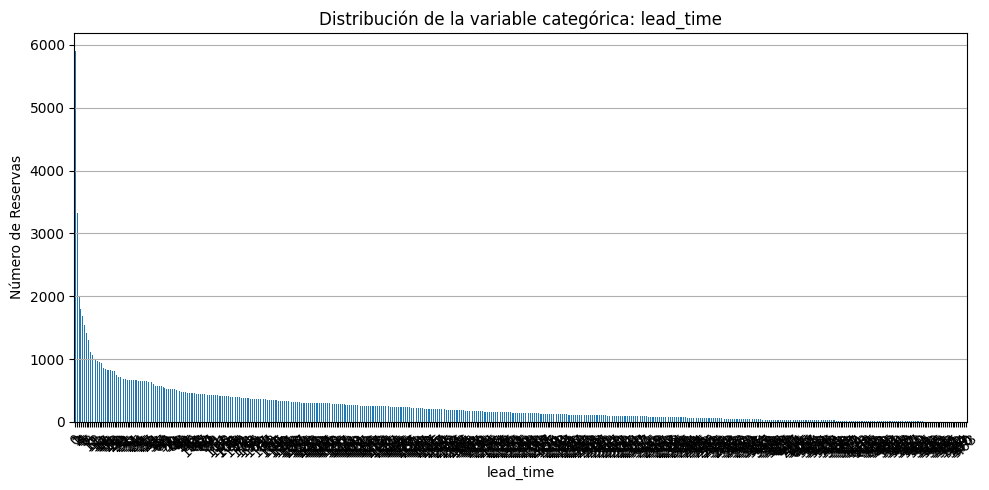

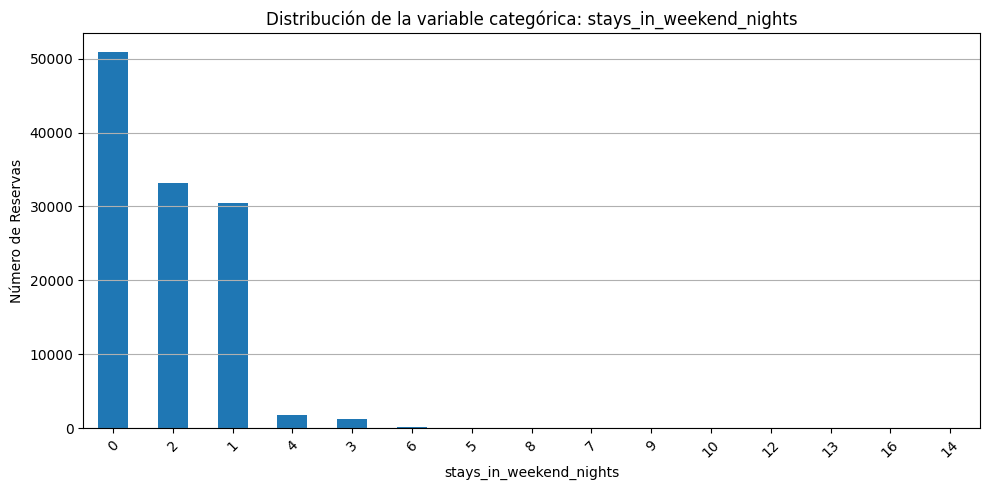

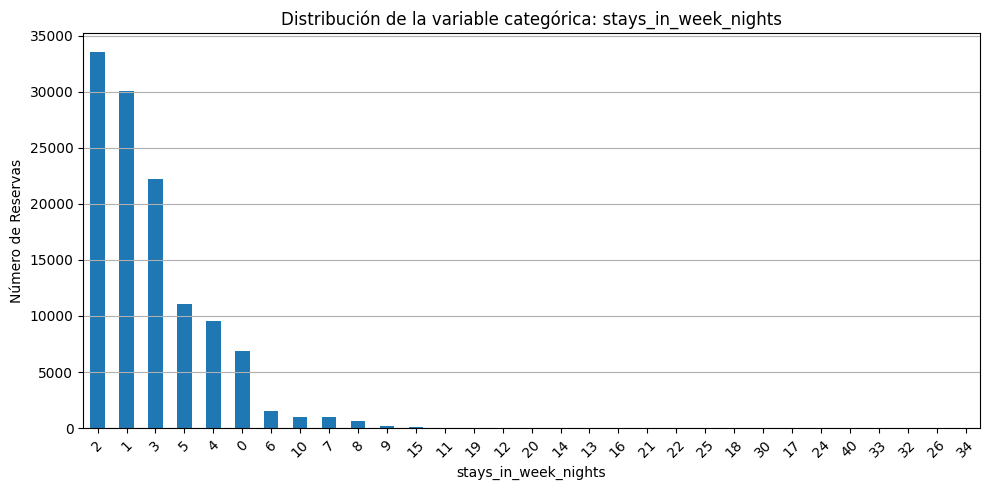

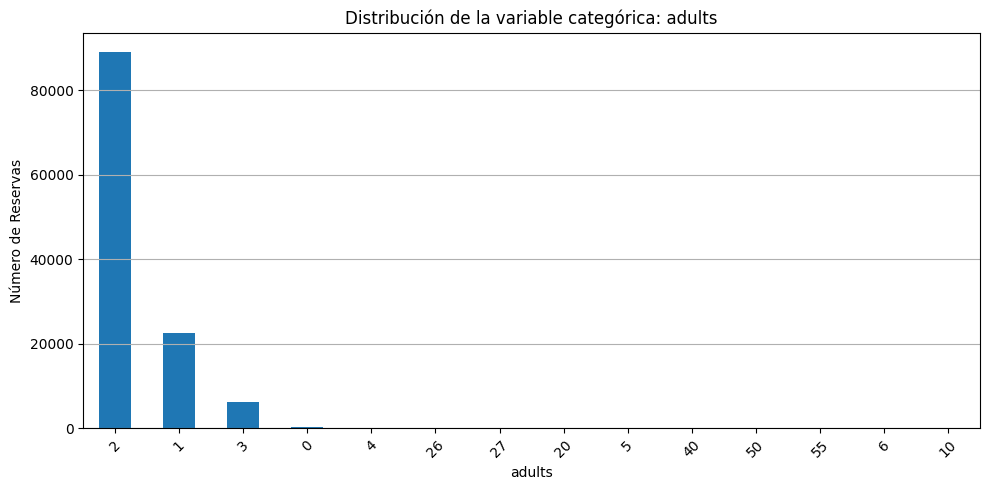

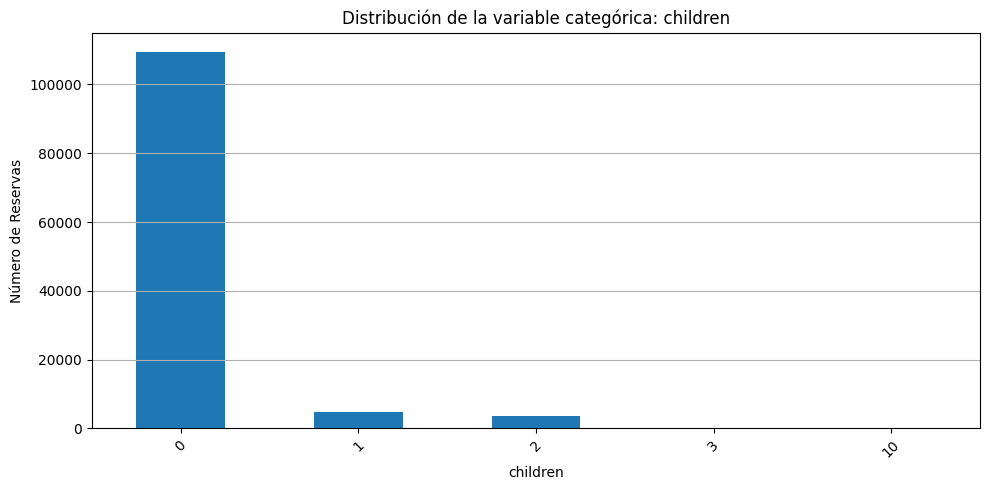

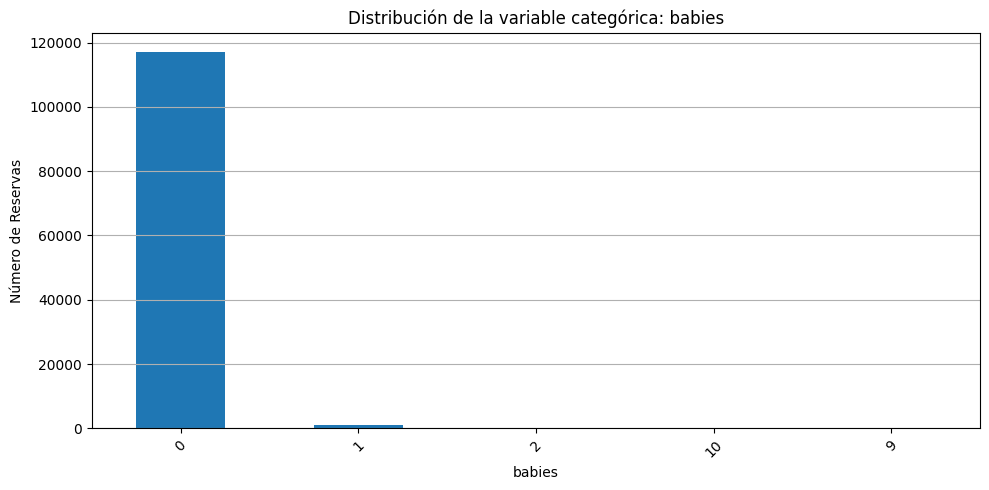

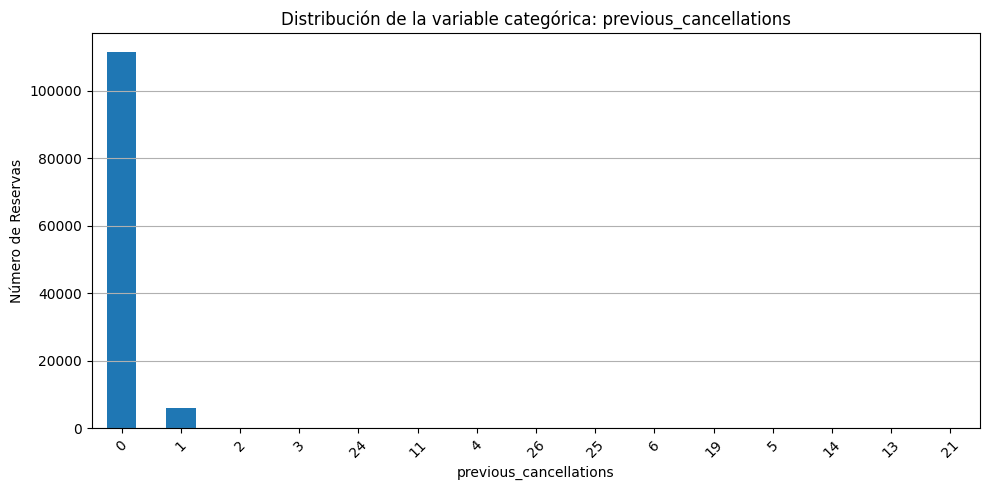

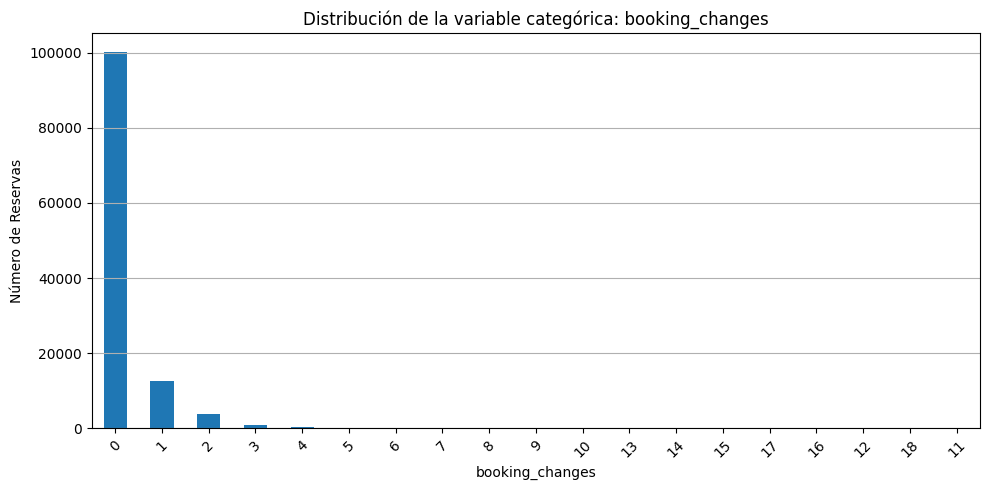

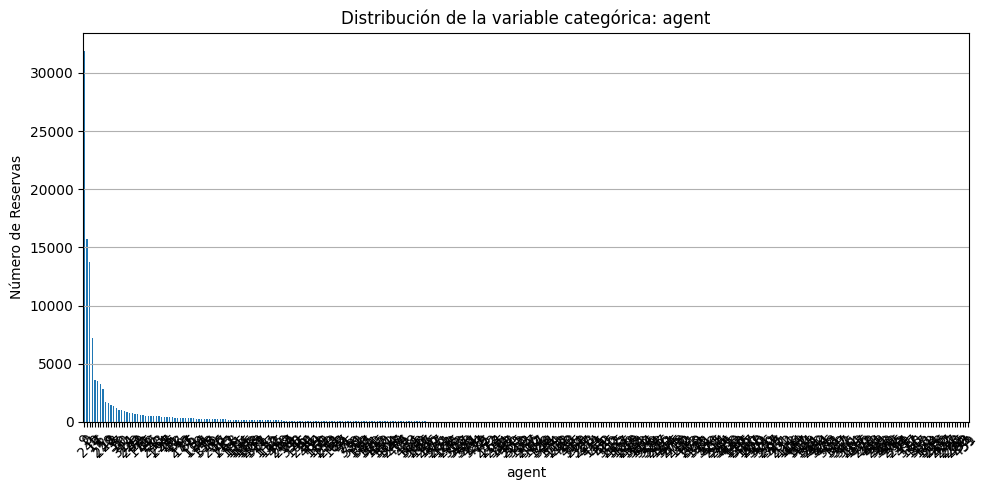

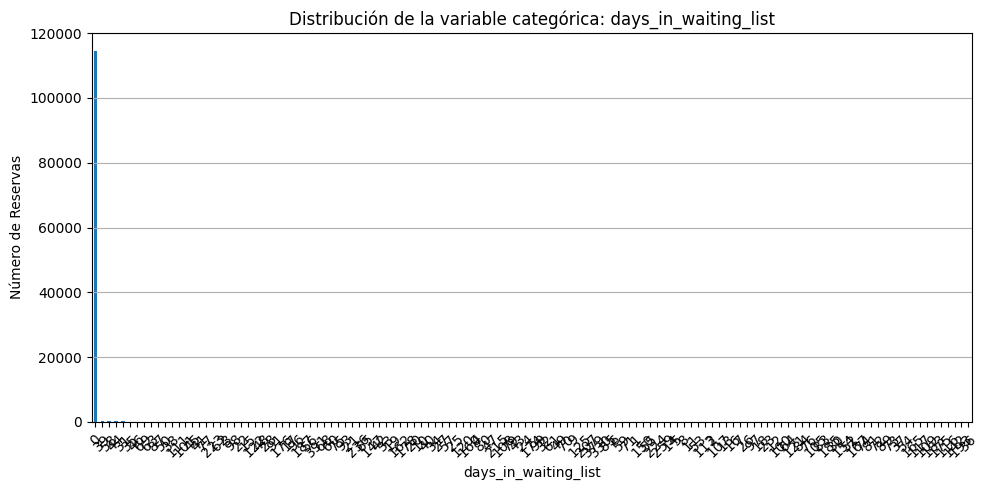

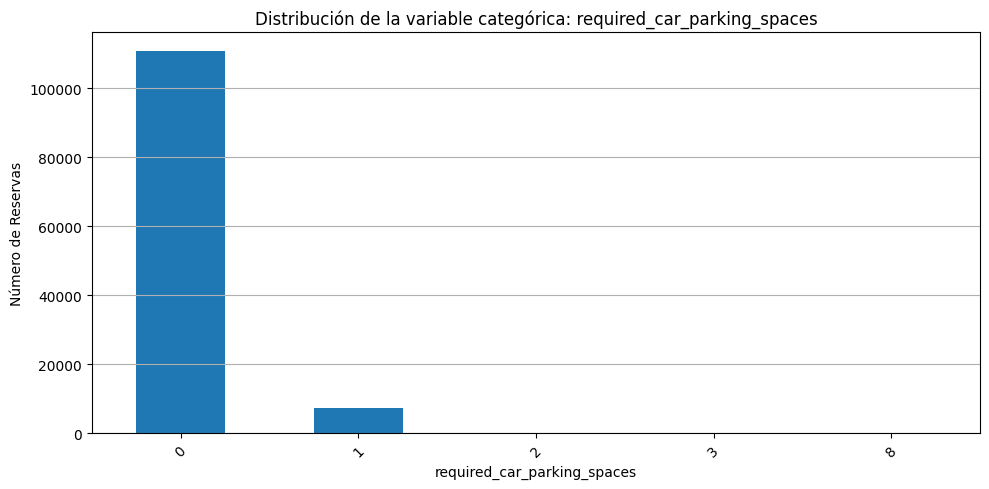

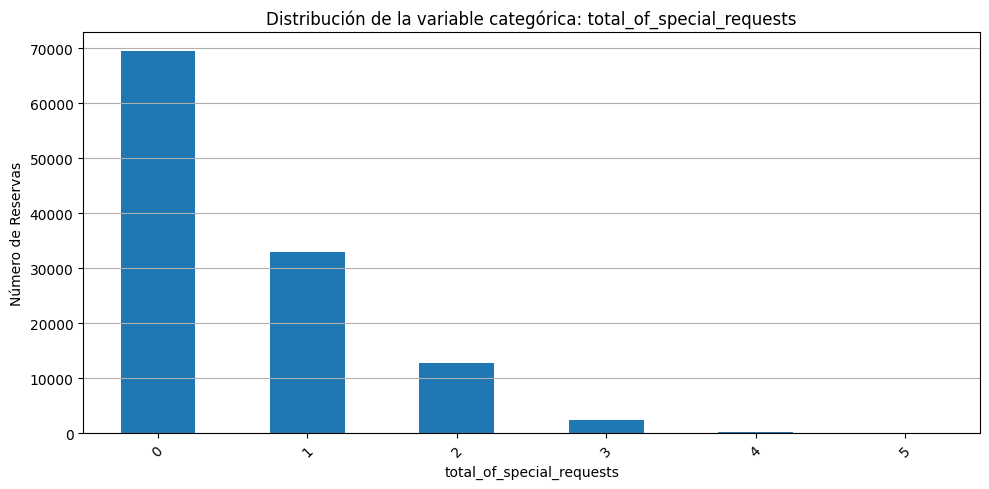

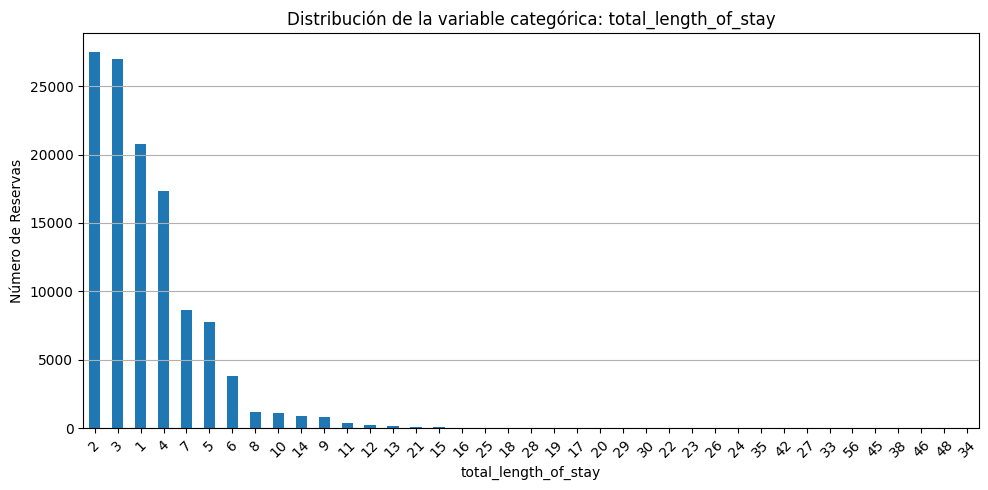

In [85]:
# Identificar automáticamente columnas categóricas
categorical_cols = df.select_dtypes(include=['int64']).columns

# Crear gráficos de barras para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts(dropna=False).plot(kind='bar')
    plt.title(f'Distribución de la variable categórica: {col}')
    plt.xlabel(col)
    plt.ylabel('Número de Reservas')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout() 

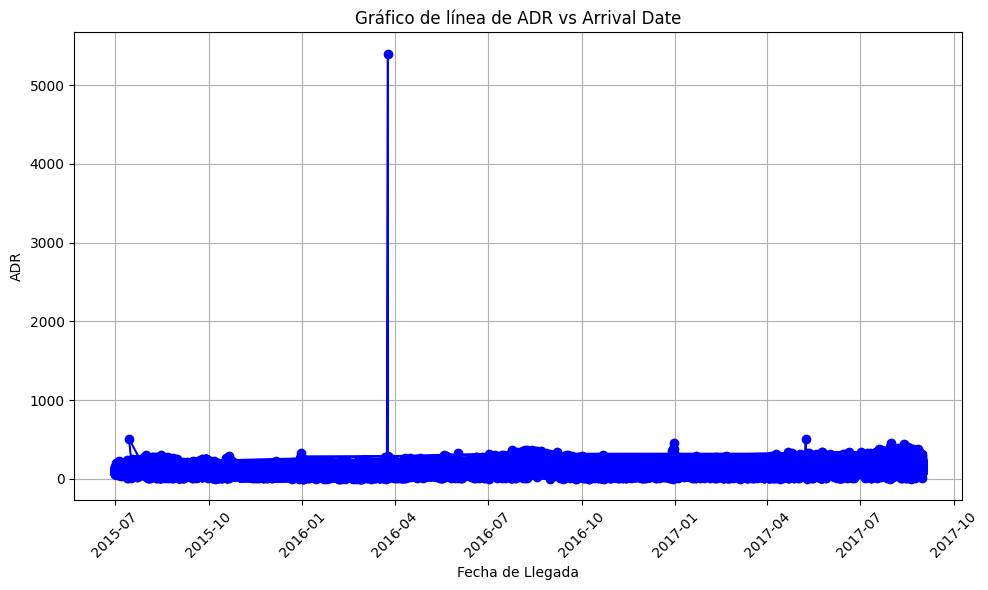

In [149]:
# Identificar automáticamente columnas numeros decimales
categorical_cols = df.select_dtypes(include=['float64']).columns

# Asegurarte de que 'arrival_date' está en formato datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))
plt.plot(df['arrival_date'], df['adr'], marker='o', linestyle='-', color='b')

# Personalizar el gráfico
plt.title('Gráfico de línea de ADR vs Arrival Date')
plt.xlabel('Fecha de Llegada')
plt.ylabel('ADR')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()